1201.2768, see eq. 9

In [31]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import uproot as uproot

In [32]:
# load the data
ssww_ll = uproot.open('../../starting_ntuples/SSWW_polarized_CMrf.root:trees/ssww/SSWW_CMrf_LL/Events')
ssww_tl = uproot.open('../../starting_ntuples/SSWW_polarized_CMrf.root:trees/ssww/SSWW_CMrf_TL/Events')
ssww_tt = uproot.open('../../starting_ntuples/SSWW_polarized_CMrf.root:trees/ssww/SSWW_CMrf_TT/Events')

In [33]:
# save data in numpy arrays

lep1_id_ll = ssww_ll['pdgIdl1'].array(library='np')
lep2_id_ll = ssww_ll['pdgIdl2'].array(library='np')
ws_mask_ll = np.where(lep1_id_ll*lep2_id_ll<0, False, True)
lep1_id_ll = lep1_id_ll[ws_mask_ll]
lep2_id_ll = lep2_id_ll[ws_mask_ll]
lepPt1_ll = ssww_ll['ptl1'].array(library='np')[ws_mask_ll]
lepPhi1_ll = ssww_ll['phil1'].array(library='np')[ws_mask_ll]
lepPt2_ll = ssww_ll['ptl2'].array(library='np')[ws_mask_ll]
lepPhi2_ll = ssww_ll['phil2'].array(library='np')[ws_mask_ll]
jetPt1_ll = ssww_ll['ptj1'].array(library='np')[ws_mask_ll]
jetPhi1_ll = ssww_ll['phij1'].array(library='np')[ws_mask_ll]
jetPt2_ll = ssww_ll['ptj2'].array(library='np')[ws_mask_ll]
jetPhi2_ll = ssww_ll['phij2'].array(library='np')[ws_mask_ll]

lep1_id_tl = ssww_tl['pdgIdl1'].array(library='np')
lep2_id_tl = ssww_tl['pdgIdl2'].array(library='np')
ws_mask_tl = np.where(lep1_id_tl*lep2_id_tl<0, False, True)
lep1_id_tl = lep1_id_tl[ws_mask_tl]
lep2_id_tl = lep2_id_tl[ws_mask_tl]
lepPt1_tl = ssww_tl['ptl1'].array(library='np')[ws_mask_tl]
lepPhi1_tl = ssww_tl['phil1'].array(library='np')[ws_mask_tl]
lepPt2_tl = ssww_tl['ptl2'].array(library='np')[ws_mask_tl]
lepPhi2_tl = ssww_tl['phil2'].array(library='np')[ws_mask_tl]
jetPt1_tl = ssww_tl['ptj1'].array(library='np')[ws_mask_tl]
jetPhi1_tl = ssww_tl['phij1'].array(library='np')[ws_mask_tl]
jetPt2_tl = ssww_tl['ptj2'].array(library='np')[ws_mask_tl]
jetPhi2_tl = ssww_tl['phij2'].array(library='np')[ws_mask_tl]

lep1_id_tt = ssww_tt['pdgIdl1'].array(library='np')
lep2_id_tt = ssww_tt['pdgIdl2'].array(library='np')
ws_mask_tt = np.where(lep1_id_tt*lep2_id_tt<0, False, True)
lep1_id_tt = lep1_id_tt[ws_mask_tt]
lep2_id_tt = lep2_id_tt[ws_mask_tt]
lepPt1_tt = ssww_tt['ptl1'].array(library='np')[ws_mask_tt]
lepPhi1_tt = ssww_tt['phil1'].array(library='np')[ws_mask_tt]
lepPt2_tt = ssww_tt['ptl2'].array(library='np')[ws_mask_tt]
lepPhi2_tt = ssww_tt['phil2'].array(library='np')[ws_mask_tt]
jetPt1_tt = ssww_tt['ptj1'].array(library='np')[ws_mask_tt]
jetPhi1_tt = ssww_tt['phij1'].array(library='np')[ws_mask_tt]
jetPt2_tt = ssww_tt['ptj2'].array(library='np')[ws_mask_tt]
jetPhi2_tt = ssww_tt['phij2'].array(library='np')[ws_mask_tt]

In [34]:
# compute R_pt

def R_pt(l1_pt, l1_phi, l2_pt, l2_phi, j1_pt, j1_phi, j2_pt, j2_phi):
    num = l1_pt*l2_pt
    denom = j1_pt*j2_pt
    res = num / denom
    return res

Rpt_ll = R_pt(lepPt1_ll, lepPhi1_ll, lepPt2_ll, lepPhi2_ll, jetPt1_ll, jetPhi1_ll, jetPt2_ll, jetPhi2_ll)
Rpt_tl = R_pt(lepPt1_tl, lepPhi1_tl, lepPt2_tl, lepPhi2_tl, jetPt1_tl, jetPhi1_tl, jetPt2_tl, jetPhi2_tl)
Rpt_tt = R_pt(lepPt1_tt, lepPhi1_tt, lepPt2_tt, lepPhi2_tt, jetPt1_tt, jetPhi1_tt, jetPt2_tt, jetPhi2_tt)

0.436278 0.3010006 0.49259093 0.40349033


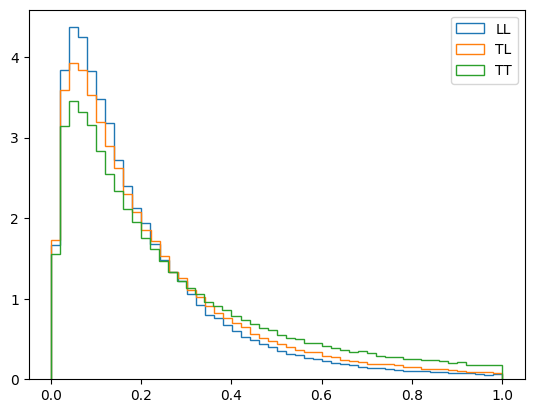

In [35]:
# visualize data

print(np.mean(Rpt_ll), np.mean(Rpt_tl), np.mean(Rpt_tt), np.mean(np.concatenate([Rpt_tl, Rpt_tt])))
threshold = 1. # visualization threshold is cut because of the large number of events in the tail
bins_ll, edges_ll, hist_ll = plt.hist(Rpt_ll[np.where(Rpt_ll < threshold, True, False)], bins=50, density=True, histtype='step', label='LL')
bins_tl, edges_tl, hist_tl = plt.hist(Rpt_tl[np.where(Rpt_tl < threshold, True, False)], bins=50, density=True, histtype='step', label='TL')
bins_tt, edges_tt, hist_tt = plt.hist(Rpt_tt[np.where(Rpt_tt < threshold, True, False)], bins=50, density=True, histtype='step', label='TT')
plt.legend()

In [36]:
# save the data

np.save('Rpt_source_ll.npy', Rpt_ll)
np.save('Rpt_source_tl.npy', Rpt_tl)
np.save('Rpt_source_tt.npy', Rpt_tt)

np.save('Rpt_source_LL.npy', Rpt_ll)
np.save('Rpt_source_TX.npy', np.concatenate([Rpt_tl, Rpt_tt]))

In [37]:
#

In [38]:
# scaling

Rpt_ll = np.log(Rpt_ll)
Rpt_tl = np.log(Rpt_tl)
Rpt_tt = np.log(Rpt_tt)

-1.8449017 -1.8130863 -1.5166918 -1.6545324


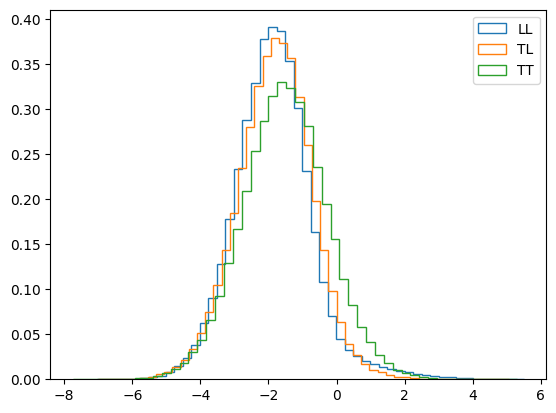

In [39]:
# visualize scaled data
print(np.mean(Rpt_ll), np.mean(Rpt_tl), np.mean(Rpt_tt), np.mean(np.concatenate([Rpt_tl, Rpt_tt])))
bins_ll, edges_ll, hist_ll = plt.hist(Rpt_ll, bins=50, density=True, histtype='step', label='LL')
bins_tl, edges_tl, hist_tl = plt.hist(Rpt_tl, bins=50, density=True, histtype='step', label='TL')
bins_tt, edges_tt, hist_tt = plt.hist(Rpt_tt, bins=50, density=True, histtype='step', label='TT')
plt.legend()

In [40]:
def normalization(arr):
    arr_mean = np.mean(arr)*np.ones(len(arr))
    arr_std = np.std(arr)*np.ones(len(arr))
    fin = (arr - arr_mean) / arr_std
    return fin

In [41]:
norm_Rpt_ll = normalization(Rpt_ll)
norm_Rpt_tl = normalization(Rpt_tl)
norm_Rpt_tt = normalization(Rpt_tt)

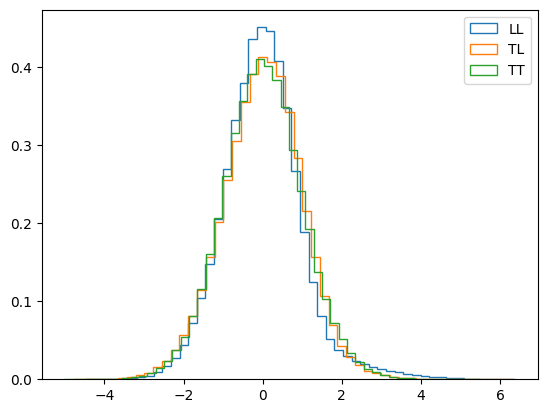

In [42]:
bins_ll, edges_ll, hist_ll = plt.hist(norm_Rpt_ll, bins=50, density=True, histtype='step', label='LL')
bins_tl, edges_tl, hist_tl = plt.hist(norm_Rpt_tl, bins=50, density=True, histtype='step', label='TL')
bins_tt, edges_tt, hist_tt = plt.hist(norm_Rpt_tt, bins=50, density=True, histtype='step', label='TT')
plt.legend()

In [43]:
# saving scalednorm data

np.save('Rpt_ll.npy', norm_Rpt_ll)
np.save('Rpt_tl.npy', norm_Rpt_tl)
np.save('Rpt_tt.npy', norm_Rpt_tt)

np.save('Rpt_LL.npy', norm_Rpt_ll)
np.save('Rpt_TX.npy', np.concatenate([norm_Rpt_tl, norm_Rpt_tt]))

In [44]:
#

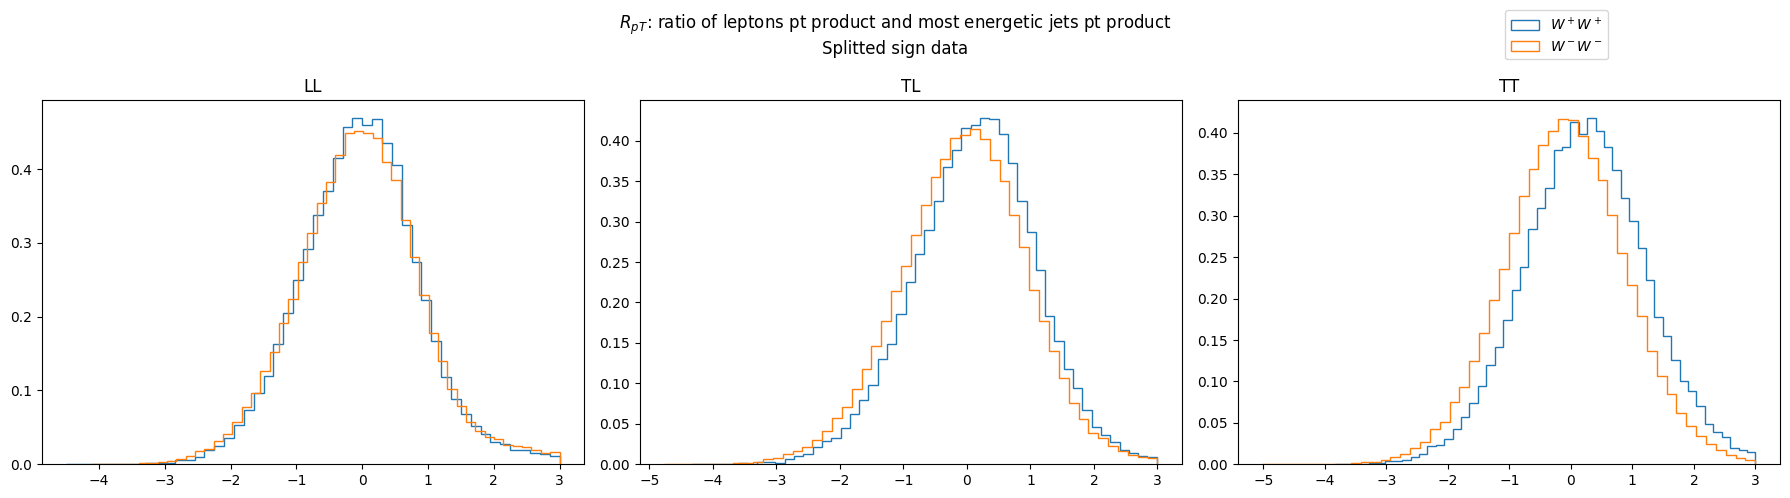

In [45]:
#Check fo differences between W+W+ or W-W- events
signWW_ll = np.where(lep1_id_ll > 0., True, False)
Rpt_ll_WpWp = norm_Rpt_ll[signWW_ll]
Rpt_ll_WmWm = norm_Rpt_ll[np.invert(signWW_ll)]

signWW_tl = np.where(lep1_id_tl > 0., True, False)
Rpt_tl_WpWp = norm_Rpt_tl[signWW_tl]
Rpt_tl_WmWm = norm_Rpt_tl[np.invert(signWW_tl)]

signWW_tt = np.where(lep1_id_tt > 0., True, False)
Rpt_tt_WpWp = norm_Rpt_tt[signWW_tt]
Rpt_tt_WmWm = norm_Rpt_tt[np.invert(signWW_tt)]
threshold = 3.

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5.))
_, _, hist_pp = ax[0].hist(Rpt_ll_WpWp[np.where(Rpt_ll_WpWp < threshold, True, False)], bins = 50, density=True, histtype='step')
_, _, hist_mm = ax[0].hist(Rpt_ll_WmWm[np.where(Rpt_ll_WmWm < threshold, True, False)], bins = 50, density=True, histtype='step')
ax[0].set_title('LL')
ax[1].hist(Rpt_tl_WpWp[np.where(Rpt_tl_WpWp < threshold, True, False)], bins = 50, density=True, histtype='step')
ax[1].hist(Rpt_tl_WmWm[np.where(Rpt_tl_WmWm < threshold, True, False)], bins = 50, density=True, histtype='step')
ax[1].set_title('TL')
ax[2].hist(Rpt_tt_WpWp[np.where(Rpt_tt_WpWp < threshold, True, False)], bins = 50, density=True, histtype='step')
ax[2].hist(Rpt_tt_WmWm[np.where(Rpt_tt_WmWm < threshold, True, False)], bins = 50, density=True, histtype='step')
ax[2].set_title('TT')
fig.suptitle(f'$R_p$$_T$: ratio of leptons pt product and most energetic jets pt product\nSplitted sign data')
fig.legend([hist_pp[0], hist_mm[0]], [f'$W^+W^+$', f'$W^-W^-$'], loc="upper right", bbox_to_anchor=(0.9,1.))
plt.tight_layout()

In [46]:
#